In [ ]:
!pip install split-folders


In [ ]:
! pip install kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

Saving kaggle.json to kaggle.json


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import splitfolders
from glob import glob

In [ ]:
!kaggle datasets download -d raddar/tuberculosis-chest-xrays-shenzhen

100% 3.49G/3.51G [00:38<00:00, 119MB/s]
100% 3.51G/3.51G [00:38<00:00, 98.3MB/s]


In [ ]:
! unzip /content/tuberculosis-chest-xrays-shenzhen.zip

Archive:  /content/tuberculosis-chest-xrays-shenzhen.zip
  inflating: images/images/CHNCXR_0001_0.png  
  inflating: images/images/CHNCXR_0002_0.png  
  inflating: images/images/CHNCXR_0003_0.png  
  inflating: images/images/CHNCXR_0004_0.png  
  inflating: images/images/CHNCXR_0005_0.png  
  inflating: images/images/CHNCXR_0006_0.png  
  inflating: images/images/CHNCXR_0007_0.png  
  inflating: images/images/CHNCXR_0008_0.png  
  inflating: images/images/CHNCXR_0009_0.png  
  inflating: images/images/CHNCXR_0010_0.png  
  inflating: images/images/CHNCXR_0011_0.png  
  inflating: images/images/CHNCXR_0012_0.png  
  inflating: images/images/CHNCXR_0013_0.png  
  inflating: images/images/CHNCXR_0014_0.png  
  inflating: images/images/CHNCXR_0015_0.png  
  inflating: images/images/CHNCXR_0016_0.png  
  inflating: images/images/CHNCXR_0017_0.png  
  inflating: images/images/CHNCXR_0018_0.png  
  inflating: images/images/CHNCXR_0019_0.png  
  inflating: images/images/CHNCXR_0020_0.png  
  i

In [ ]:
datainfo = pd.read_csv('/content/shenzhen_metadata.csv')
datainfo.head()


,study_id,sex,age,findings
0,CHNCXR_0001_0.png,Male,45,normal
1,CHNCXR_0002_0.png,Male,63,normal
2,CHNCXR_0003_0.png,Female,48,normal
3,CHNCXR_0004_0.png,Male,58,normal
4,CHNCXR_0005_0.png,Male,28,normal


In [ ]:
!pip install plotly
import plotly.offline as py
import plotly.figure_factory as ff

In [ ]:
dat = ff.create_table(datainfo.head())
py.iplot(dat)

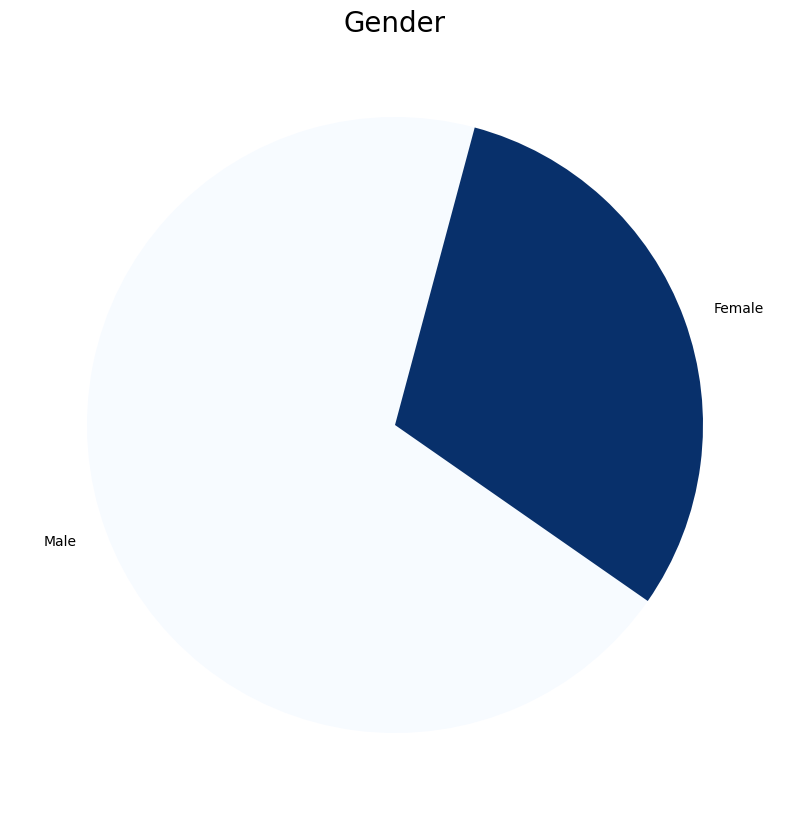

In [ ]:
color = plt.cm.Blues(np.linspace(0, 1, 2))
datainfo['sex'].value_counts().plot.pie(colors = color, figsize = (10, 10), startangle = 75)

plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.show()

In [ ]:
datainfo['findings'].value_counts()


normal                                                    326
bilateral PTB                                              61
Right PTB                                                  45
PTB in the right upper field                               27
STB                                                        19
                                                         ... 
left upper PTB, left pleurisy                               1
right PTB,right pneumothorax                                1
right upper field PTB                                       1
right secondary PTB  with bilateral  pleurisy               1
bilateral secondary PTB  with right pleural thickening      1
Name: findings, Length: 75, dtype: int64

In [ ]:
normal = []
positive =  []

In [ ]:
def extract_target(x):
  for i in range(len(x['study_id'])):
    if x['findings'][i] == 'normal':
      normal.append(x['study_id'][i])
    else:
      positive.append(x['study_id'][i])

In [ ]:
extract_target(datainfo)


In [ ]:
len(normal)


978

In [ ]:
len(positive)

1008

In [ ]:
!mkdir data
!mkdir data/normal
!mkdir data/positive

In [ ]:
for i in range(len(normal)):
 path = '/content/images/images/' + normal[i]
 !mv $path /content/data/normal

In [ ]:
for i in range(len(positive)):
  path = '/content/images/images/' + positive[i]
  !mv $path /content/data/positive


mv: cannot stat '/content/images/images/CHNCXR_0327_1.png': No such file or directory
mv: cannot stat '/content/images/images/CHNCXR_0328_1.png': No such file or directory
mv: cannot stat '/content/images/images/CHNCXR_0329_1.png': No such file or directory
mv: cannot stat '/content/images/images/CHNCXR_0330_1.png': No such file or directory
mv: cannot stat '/content/images/images/CHNCXR_0331_1.png': No such file or directory
mv: cannot stat '/content/images/images/CHNCXR_0332_1.png': No such file or directory
mv: cannot stat '/content/images/images/CHNCXR_0333_1.png': No such file or directory
mv: cannot stat '/content/images/images/CHNCXR_0334_1.png': No such file or directory
mv: cannot stat '/content/images/images/CHNCXR_0335_1.png': No such file or directory
mv: cannot stat '/content/images/images/CHNCXR_0336_1.png': No such file or directory
mv: cannot stat '/content/images/images/CHNCXR_0337_1.png': No such file or directory
mv: cannot stat '/content/images/images/CHNCXR_0338_1.

In [ ]:
input_folder = "/content/data"
output = "/content/dataset" #where you want the split datasets saved. one will be created if none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .0, 0.2))

Copying files: 662 files [00:21, 31.20 files/s]


In [ ]:
tuberculosis  = glob('/content/dataset/test/positive/*.png')
normal = glob('/content/dataset/test/normal/*.png')

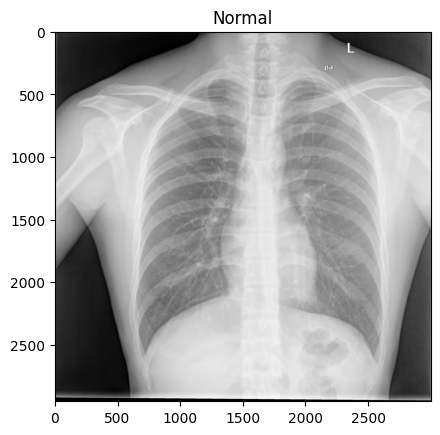

In [ ]:
plt.title('Normal')
plt.imshow(image.load_img(np.random.choice(normal)))
plt.show()

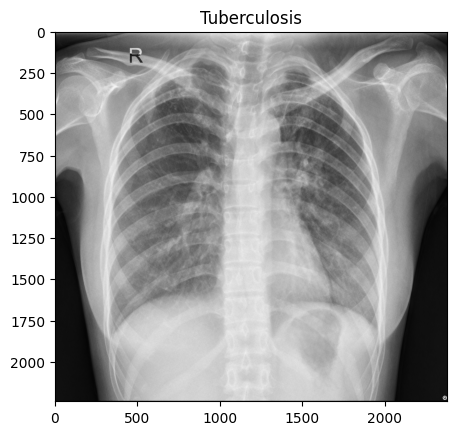

In [ ]:
plt.title('Tuberculosis')
plt.imshow(image.load_img(np.random.choice(tuberculosis)))
plt.show()

In [ ]:
# Install TensorFlow 2.x (if not already installed)

import tensorflow as tf
from tensorflow.python.keras.backend import set_session

# GPU memory fraction configuration
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
config.gpu_options.visible_device_list = "1"  # Adjust the GPU device index if needed
config.allow_soft_placement = True
config.log_device_placement = True
config.gpu_options.allocator_type = 'BFC'

# Set the session with the configured GPU options
set_session(tf.compat.v1.Session(config=config))


Device mapping: no known devices.


In [ ]:
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger

from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import keras.metrics
from keras.optimizers import Adam, RMSprop
import numpy as np


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

from sklearn.metrics import auc
import numpy, scipy.io


In [ ]:
model_ =keras.applications.densenet.DenseNet121(include_top=True, weights='imagenet')


33188688/33188688 [==============================] - 0s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load pre-trained DenseNet121 model
model_ = DenseNet121(include_top=True, weights='imagenet')

# Add a dense layer for your specific task
x = Dense(256, activation='relu')(model_.layers[-2].output)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax', name='predictions')(x)

# Create a new model with modified output
model = Model(inputs=model_.input, outputs=x)

# Freeze the layers of the pre-trained model for initial training
for layer in model_.layers[:-10]:  # Unfreeze the last 10 layers
    layer.trainable = False

# Compile the model
optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up data generators with data augmentation
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data_gen = train_datagen.flow_from_directory(
    '/content/dataset/train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

test_data_gen = test_datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

# Train the model
model.fit_generator(train_data_gen, epochs=10, validation_data=test_data_gen)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data_gen)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Found 528 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


<ipython-input-29-7db15c0ace5f>:57: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/10
17/17 [==============================] - 101s 6s/step - loss: 1.0649 - accuracy: 0.5606 - val_loss: 0.5130 - val_accuracy: 0.8134
Epoch 2/10
17/17 [==============================] - 94s 5s/step - loss: 0.5590 - accuracy: 0.7405 - val_loss: 0.5931 - val_accuracy: 0.6791
Epoch 3/10
17/17 [==============================] - 91s 5s/step - loss: 0.4716 - accuracy: 0.7784 - val_loss: 0.7199 - val_accuracy: 0.6493
Epoch 4/10
17/17 [==============================] - 94s 5s/step - loss: 0.4897 - accuracy: 0.7424 - val_loss: 0.6811 - val_accuracy: 0.6493
Epoch 5/10
17/17 [==============================] - 94s 5s/step - loss: 0.4520 - accuracy: 0.7898 - val_loss: 0.8499 - val_accuracy: 0.5896
Epoch 6/10
17/17 [==============================] - 95s 6s/step - loss: 0.3956 - accuracy: 0.8390 - val_loss: 0.4445 - val_accuracy: 0.8209
Epoch 7/10
17/17 [==============================] - 92s 5s/step - loss: 0.3887 - accuracy: 0.8447 - val_loss: 0.4342 - val_accuracy: 0.8134
Epoch 8/10
17/17 [=

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image file
img_path = '/content/dataset/test/normal/CHNCXR_0004_0.png'
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to a 4D tensor
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Preprocess the input data
x = x / 255.0  # Rescale pixel values to [0, 1] range

# Predict the output
predictions = model.predict(x)

# Get the predicted class label
predicted_class = np.argmax(predictions)

# Print the predicted class
if predicted_class == 0:
    print("The model predicts: Normal")
else:
    print("The model predicts: Tuberculosis")


1/1 [==============================] - 0s 102ms/step
The model predicts: Normal
